In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import kstest

# Read bed files and preprocess

Read in the bed files

In [72]:
TEs_df = pd.read_csv('D:/TEs_CoTEs_pipline/data/V2-TEs/non_olap/TEs/542_L1MA1_Merged.bed',delimiter='\t',header=None)
CoTE_df=pd.read_csv('D:/TEs_CoTEs_pipline/data/V2-TEs/non_olap/cores1000/542_L1MA1_Merged.bed',delimiter='\t',header=None)

In [73]:
TEs_df

,0,1,2,3
0,chr1,4075107,4075198,1
1,chr1,5553424,5553604,1
2,chr1,6312196,6312457,1
3,chr1,6312767,6312853,1
4,chr1,9585312,9585506,1
...,...,...,...,...
4354,chrY,23568157,23568681,1
4355,chrY,26101933,26102457,1
4356,chrY,26102606,26102659,1
4357,chrY,26102663,26102755,1


In [74]:
CoTE_df

,0,1,2
0,chr3,162617688,163586686
1,chrX,66132623,66846941
2,chrX,66846980,67382602
3,chrX,78234439,79179059
4,chrX,84299067,84656709
5,chrX,86101264,86780526
6,chrX,92416129,93562722
7,chrX,94305761,95246445
8,chrX,95310190,96209102
9,chrX,112938019,114131076


Assign columns to the two dataframes

In [75]:
TEs_df.columns=['chr','start','end','N']
del TEs_df['N']
TEs_df.head()

,chr,start,end
0,chr1,4075107,4075198
1,chr1,5553424,5553604
2,chr1,6312196,6312457
3,chr1,6312767,6312853
4,chr1,9585312,9585506


In [76]:
CoTE_df.columns=['chr','start','end']

In [77]:
CoTE_df

,chr,start,end
0,chr3,162617688,163586686
1,chrX,66132623,66846941
2,chrX,66846980,67382602
3,chrX,78234439,79179059
4,chrX,84299067,84656709
5,chrX,86101264,86780526
6,chrX,92416129,93562722
7,chrX,94305761,95246445
8,chrX,95310190,96209102
9,chrX,112938019,114131076


In [78]:
chromosome_counts = TEs_df['chr'].value_counts()

(array([54.,  7.,  3.,  5.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.,  77., 153., 229., 305., 381., 457., 533., 609., 685., 761.,
        837.]),
 <BarContainer object of 11 artists>)

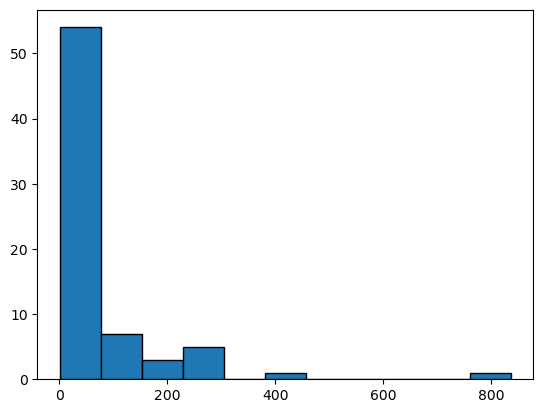

In [79]:
plt.hist(chromosome_counts,bins=11,edgecolor='k')


(array([17.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <BarContainer object of 10 artists>)

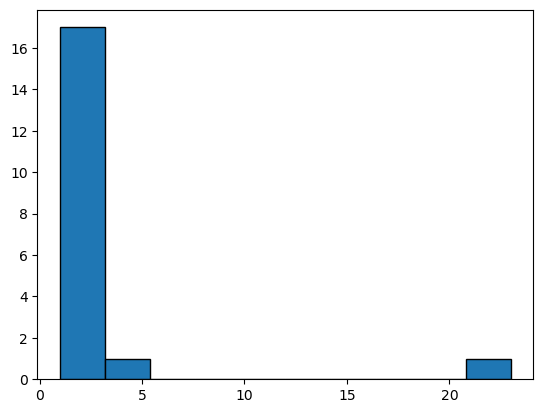

In [80]:
cluster_chr=CoTE_df['chr'].value_counts()
plt.hist(cluster_chr,edgecolor='k')

Visually do not follow normal distribution, should use a non-parametric test instead

# Perform Mann-Whitney U-test

In [81]:
#This function return chromosome that has significant difference between the number of TEs and number of CoTEs
def compare_counts(TEs, CoTEs, chromosome_of_interest):
    # Subset data for the chosen chromosome
    group1 = TEs[TEs['chr'] == chromosome_of_interest]['start']
    group2 = CoTEs[CoTEs['chr'] == chromosome_of_interest]['start']

    # Perform Mann-Whitney U test
    if(len(group2)!=0):
        try:
            statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
            if(p_value<=0.05):
                return {'chr': chromosome_of_interest, 'p_value': p_value}
        except ValueError:#when the sample sizes are too small
            print(f"Invalid test for chromosome {chromosome_of_interest}")
            return None
    else:#if there is no cluster on the chromosome
        return {'chr':chromosome_of_interest,'p_value':'NA'}

In [82]:
unique_elements = TEs_df['chr'].unique()

In [83]:
results_m=[]
for i in unique_elements:
    result=compare_counts(TEs_df,CoTE_df,i)
    if(result != None):
        results_m.append(result)
results_df_m = pd.DataFrame(results_m)


In [84]:
results_df_m

,chr,p_value
0,chr10_GL383545v1_alt,NA
1,chr11,NA
2,chr11_GL383547v1_alt,NA
3,chr11_JH159136v1_alt,NA
4,chr12,NA
5,chr14_KI270846v1_alt,NA
6,chr15_KI270727v1_random,NA
7,chr15_KI270848v1_alt,NA
8,chr15_KI270849v1_alt,NA
9,chr15_KI270852v1_alt,NA


In [85]:
len(results_df_m[results_df_m['p_value']!='NA'])

0

In [86]:
results_df_m[results_df_m['p_value']!='NA']

,chr,p_value


In [87]:
len(unique_elements)

71

# Perform KS test

In [96]:
#This function return chromosome that has significant difference between the number of TEs and number of CoTEs
def compare_counts_ks(TEs, CoTEs, chromosome_of_interest):
    # Subset data for the chosen chromosome
    group1 = TEs[TEs['chr'] == chromosome_of_interest]['start']
    group2 = CoTEs[CoTEs['chr'] == chromosome_of_interest]['start']
    print(chromosome_of_interest)
    # Perform KS test
    if(len(group2)!=0):
        try:
            statistic, p_value = kstest(group1, group2, alternative='two-sided')
            print(p_value)
            if(p_value<=0.05):
                return {'chr': chromosome_of_interest, 'p_value': p_value}
        except ValueError:#when the sample sizes are too small
            print(f"Invalid test for chromosome {chromosome_of_interest}")
            return None
    else:#if there is no cluster on the chromosome
       # print(len(group2))
        return {'chr':chromosome_of_interest,'p_value':'NA'}

In [89]:
group2 = CoTE_df[CoTE_df['chr'] == 'chr1']['start']

In [92]:
len(group2)

3

In [97]:
results=[]
for i in unique_elements:
    result=compare_counts_ks(TEs_df,CoTE_df,i)
    if(result != None):
        results.append(result)
results_df = pd.DataFrame(results)

chr1
0.10540336081736186
chr10
0.8192771084337346
chr10_GL383545v1_alt
chr11
chr11_GL383547v1_alt
chr11_JH159136v1_alt
chr12
chr13
0.9896907216494846
chr14
1.0
chr14_KI270846v1_alt
chr15
0.32432432432432434
chr15_KI270727v1_random
chr15_KI270848v1_alt
chr15_KI270849v1_alt
chr15_KI270852v1_alt
chr15_KI270905v1_alt
chr16
chr16_KI270853v1_alt
chr17
0.9066666666666666
chr17_JH159147v1_alt
chr17_JH159148v1_alt
chr18
chr19
0.7391304347826086
chr19_GL949746v1_alt
chr19_GL949752v1_alt
chr19_KI270938v1_alt
chr1_KI270759v1_alt
chr2
0.75098814229249
chr20
chr21
0.9855072463768116
chr21_GL383578v2_alt
chr21_GL383580v2_alt
chr22
chr22_KI270733v1_random
chr2_KI270767v1_alt
chr2_KI270893v1_alt
chr3
0.5312500000000003
chr3_KI270777v1_alt
chr3_KI270778v1_alt
chr3_KI270780v1_alt
chr3_KI270783v1_alt
chr4
0.9480932530492512
chr4_GL000257v2_alt
chr4_GL383528v1_alt
chr4_KI270790v1_alt
chr5
0.8789761079006947
chr5_KI270796v1_alt
chr6
0.8190209030856939
chr6_GL000250v2_alt
chr6_GL000251v2_alt
0.25
chr6_GL0002

In [95]:
results_df

,chr,p_value
0,chr10_GL383545v1_alt,NA
1,chr11,NA
2,chr11_GL383547v1_alt,NA
3,chr11_JH159136v1_alt,NA
4,chr12,NA
5,chr14_KI270846v1_alt,NA
6,chr15_KI270727v1_random,NA
7,chr15_KI270848v1_alt,NA
8,chr15_KI270849v1_alt,NA
9,chr15_KI270852v1_alt,NA


In [63]:
results_df[results_df['p_value']!='NA']

,chr,p_value
0,chr1,0.007507
57,chr5,0.011606
63,chr6,0.02957
